In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [55]:
data = pd.read_csv("final_cleaned_data.csv", sep=';')

In [56]:
data.head()

,Rank,Title,Artists,Date,Danceability,Energy,Loudness,Speechiness,Acousticness,Instrumentalness,...,# of Artist,Artist (Ind.),# of Nationality,Nationality,Continent,Points (Total),Points (Ind for each Artist/Nat),id,Song URL,Loudness_norm
0,1,Ella Baila Sola,"Eslabon Armado, Peso Pluma",2023-05-29,0.668,0.758,-5.176,0.033,0.483,0.000,...,Artist 1,Eslabon Armado,Nationality 1,Mexico,Latin-America,200,100.0,3qQbCzHBycnDpGskqOWY0E,https://open.spotify.com/track/3qQbCzHBycnDpGs...,0.849862
1,2,WHERE SHE GOES,Bad Bunny,2023-05-29,0.652,0.800,-4.019,0.061,0.143,0.629,...,Artist 1,Bad Bunny,Nationality 1,Puerto Rico,Latin-America,199,199.0,7ro0hRteUMfnOioTFI5TG1,https://open.spotify.com/track/7ro0hRteUMfnOio...,0.883423
2,3,La Bebe - Remix,"Yng Lvcas, Peso Pluma",2023-05-29,0.812,0.479,-5.678,0.333,0.213,0.000,...,Artist 1,Yng Lvcas,Nationality 1,Mexico,Latin-America,198,99.0,2UW7JaomAMuX9pZrjVpHAU,https://open.spotify.com/track/2UW7JaomAMuX9pZ...,0.835301
3,4,Cupid - Twin Ver.,FIFTY FIFTY,2023-05-29,0.783,0.592,-8.332,0.033,0.435,0.000,...,Artist 1,FIFTY FIFTY,Nationality 1,South Korea,Asia,197,197.0,7FbrGaHYVDmfr7KoLIZnQ7,https://open.spotify.com/track/7FbrGaHYVDmfr7K...,0.758318
4,5,un x100to,"Grupo Frontera, Bad Bunny",2023-05-29,0.569,0.724,-4.076,0.047,0.228,0.000,...,Artist 1,Grupo Frontera,Nationality 1,Mexico,Latin-America,196,98.0,6pD0ufEQq0xdHSsRbg9LBK,https://open.spotify.com/track/6pD0ufEQq0xdHSs...,0.881769


In [57]:
subset = data[['Energy', 'Danceability']].dropna()

In [58]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(subset)

In [59]:
inertia = []
K = range(1, 11)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(scaled_features)
    inertia.append(kmeans.inertia_)

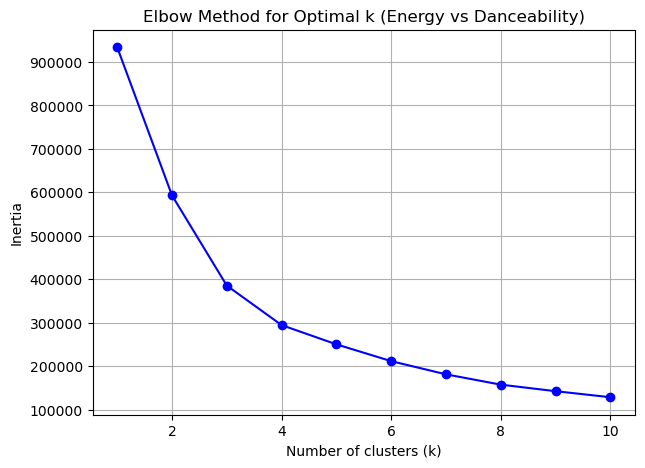

In [60]:
plt.figure(figsize=(7, 5))
plt.plot(K, inertia, 'bo-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k (Energy vs Danceability)')
plt.grid(True)
plt.show()

In [61]:
optimal_k = 3  # You can adjust this based on the elbow curve
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
subset['Cluster'] = kmeans.fit_predict(scaled_features)

In [62]:
# Inverse transform the cluster centers
centers = scaler.inverse_transform(kmeans.cluster_centers_)

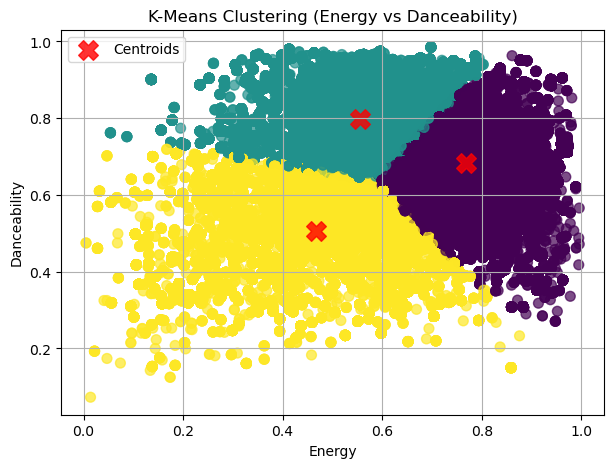

In [63]:
plt.figure(figsize=(7, 5))
plt.scatter(subset['Energy'], subset['Danceability'],
            c=subset['Cluster'], cmap='viridis', s=50, alpha=0.7)
centers = scaler.inverse_transform(kmeans.cluster_centers_)
plt.scatter(centers[:, 0], centers[:, 1],
            c='red', s=200, alpha=0.8, marker='X', label='Centroids')

plt.title('K-Means Clustering (Energy vs Danceability)')
plt.xlabel('Energy')
plt.ylabel('Danceability')
plt.legend()
plt.grid(True)
plt.show()

In [64]:
print("\nCluster Centers (Original Scale):")
for i, center in enumerate(centers):
    print(f"Cluster {i}: Energy={center[0]:.3f}, Danceability={center[1]:.3f}")
    
print("\nNumber of items in each cluster:")
print(subset['Cluster'].value_counts())


Cluster Centers (Original Scale):
Cluster 0: Energy=0.769, Danceability=0.682
Cluster 1: Energy=0.556, Danceability=0.799
Cluster 2: Energy=0.467, Danceability=0.506

Number of items in each cluster:
Cluster
0    214571
1    162020
2     90470
Name: count, dtype: int64


In [65]:
print(f'Energy Mean : {np.mean(subset[['Energy']])}')
print(f'Danceability Mean : {np.mean(subset[['Danceability']])}')

Energy Mean : 0.6368968892714229
Danceability Mean : 0.6885900107266502


In [66]:
def interpret_cluster(energy, Danceability):
    """Return a descriptive label based on cluster center characteristics."""
    if energy > 0.6 and Danceability > 0.7:
        return "🎉 High Energy & Happy songs (energetic, uplifting mood)"
    elif energy < 0.6 and Danceability < 0.6:
        return "💤 Low Energy & Sad songs (calm, mellow, emotional)"
    elif energy > 0.7 and Danceability < 0.6:
        return "🔥 Energetic but Dark songs (intense, aggressive tone)"
    elif energy < 0.6 and Danceability > 0.7:
        return "🌤️ Relaxed but Cheerful songs (chill, peaceful mood)"
    else:
        return "🎧 Moderate Energy & Neutral mood songs"

print("\nCluster Interpretations:")
for i, center in enumerate(centers):
    desc = interpret_cluster(center[0], center[1])
    print(f"Cluster {i}: {desc}")


Cluster Interpretations:
Cluster 0: 🎧 Moderate Energy & Neutral mood songs
Cluster 1: 🌤️ Relaxed but Cheerful songs (chill, peaceful mood)
Cluster 2: 💤 Low Energy & Sad songs (calm, mellow, emotional)


In [67]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import StratifiedKFold, cross_val_predict
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

In [68]:
def mood_label(row):
    if row['Energy'] >= 0.63 and row['Danceability'] >= 0.68:
        return 'Joy'   # High Energy, High Danceability
    elif row['Energy'] < 0.63 and row['Danceability'] >= 0.68:
        return 'Happiness'  # Low Energy, High Danceability
    elif row['Energy'] >= 0.63 and row['Danceability'] < 0.68:
        return 'Anxiety'      # High Energy, Low Danceability
    else:
        return 'Depression'   # Low Energy, Low Danceability

subset['Mood'] = subset.apply(mood_label, axis=1)

print("\nMood distribution:")
print(subset['Mood'].value_counts())


Mood distribution:
Mood
Joy           156754
Happiness     115285
Anxiety       103715
Depression     91307
Name: count, dtype: int64


In [69]:
X = subset[['Energy', 'Danceability']]
y = subset['Mood']


In [70]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [71]:
models = {
    "Logistic Regression": LogisticRegression(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42, n_estimators=100),
    "SVM": SVC(random_state=42, kernel='rbf'),
    "KNN": KNeighborsClassifier(n_neighbors=5)
}

In [72]:
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

In [73]:
for name, model in models.items():
    print("\n======================================")
    print(f"🔹 Model: {name}")
    print("======================================")
    
    # Cross-validated predictions
    y_pred = cross_val_predict(model, X_scaled, y, cv=skf)
    
    # Classification report (Precision, Recall, F1)
    print("\nPerformance Metrics:")
    print(classification_report(y, y_pred, digits=3))


🔹 Model: Logistic Regression

Performance Metrics:
              precision    recall  f1-score   support

     Anxiety      0.997     1.000     0.999    103715
  Depression      1.000     0.994     0.997     91307
   Happiness      0.997     0.999     0.998    115285
         Joy      0.999     1.000     1.000    156754

    accuracy                          0.999    467061
   macro avg      0.999     0.998     0.998    467061
weighted avg      0.999     0.999     0.999    467061


🔹 Model: Random Forest

Performance Metrics:
              precision    recall  f1-score   support

     Anxiety      1.000     1.000     1.000    103715
  Depression      1.000     1.000     1.000     91307
   Happiness      1.000     1.000     1.000    115285
         Joy      1.000     1.000     1.000    156754

    accuracy                          1.000    467061
   macro avg      1.000     1.000     1.000    467061
weighted avg      1.000     1.000     1.000    467061


🔹 Model: SVM

Performance Metri